In [1]:
did = False
if not did:
    %cd ..
    did = True

/Users/adsurbum/projects/univer/EffectiveNPI/src


In [6]:
%load_ext autoreload
%autoreload
exec(open("plot_utils.py").read())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [15]:
%%time
import os,fnmatch
dir_name = '../{}/{}/inference/'.format('output','2020-05-04-start-date-5zeros')

countries = [a[:-4] for a in fnmatch.filter(os.listdir(dir_name), '*.npz')]
countries = ['Sweden',
     'Belgium',
     'United_Kingdom',
     'Switzerland',
    #  'Wuhan',
     'Germany',
     'Austria',
     'Spain',
     'France',
     'Italy',
     'Denmark',
     'Norway']

def calc_stats(countries,dir_name):
    dic_arr = []
    loglik_arr = []
    lnprobs = []
    for country_name in countries:
        load_data(dir_name+country_name+'.npz',country_name)
#         dic_arr.append(calc_DIC())
        loglik_arr.append(calc_LoglikMAP())
        lnprobs.append(lnprobability.mean())
    return dic_arr,loglik_arr,lnprobs
def round_list(lst):
    return [round(v,1) for v in lst]

CPU times: user 617 µs, sys: 846 µs, total: 1.46 ms
Wall time: 1.44 ms


In [10]:
%%time
dir_name = '../{}/{}/inference/'.format('output','2020-05-04-start-date-5zeros')
five = calc_stats(countries,dir_name)

CPU times: user 12.8 s, sys: 3.98 s, total: 16.8 s
Wall time: 22.6 s


In [11]:
dir_name = '../{}/{}/inference/'.format('output','2020-05-04-start-date-10zeros')
ten = calc_stats(countries,dir_name)
dir_name = '../{}/{}/inference/'.format('output','2020-05-04-start-date-15zeros')
fiveteen = calc_stats(countries,dir_name)

In [12]:
dir_name = '../{}/{}/inference/'.format('output','2020-05-04-start-date-1zero-copied')
one = calc_stats(countries,dir_name)

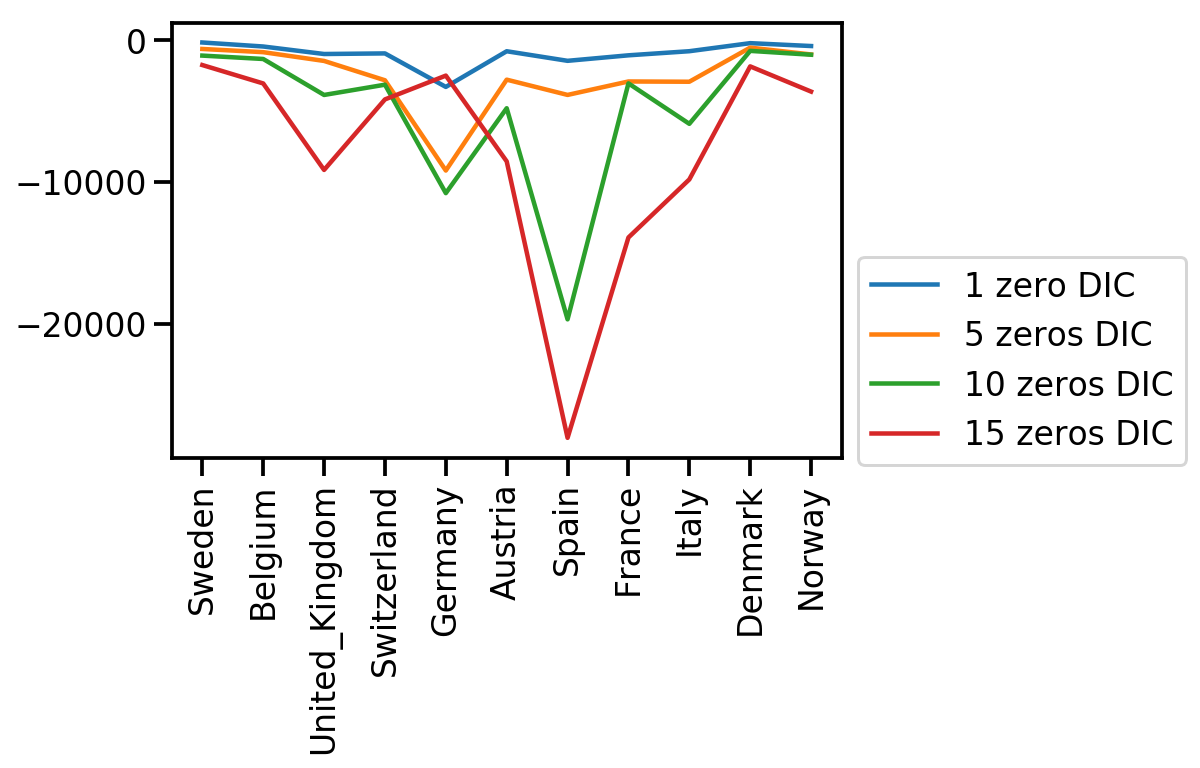

In [8]:
#WRONG old data
import matplotlib.pyplot as plt
plt.plot(one[0],label='1 zero DIC')
plt.plot(five[0],label='5 zeros DIC')
plt.plot(ten[0], label='10 zeros DIC')
plt.plot(fiveteen[0], label='15 zeros DIC')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
#WRONG old data

[('Sweden', -7.0, -7.0, -6.7, -6.0),
 ('Belgium', -11.0, -10.5, -9.2, -8.1),
 ('United_Kingdom', -13.4, -12.8, -11.8, -10.9),
 ('Switzerland', -29.7, -27.5, -24.9, -23.6),
 ('Germany', -75.3, -67.1, -69.7, -56.1),
 ('Austria', -9.6, -8.7, -8.4, -7.6),
 ('Spain', -26.2, -23.8, -21.2, -20.6),
 ('France', -20.4, -18.6, -17.1, -16.0),
 ('Italy', -111.5, -106.5, -101.3, -94.5),
 ('Denmark', -12.1, -11.9, -10.9, -9.8),
 ('Norway', -12.0, -11.1, -11.0, -9.8)]

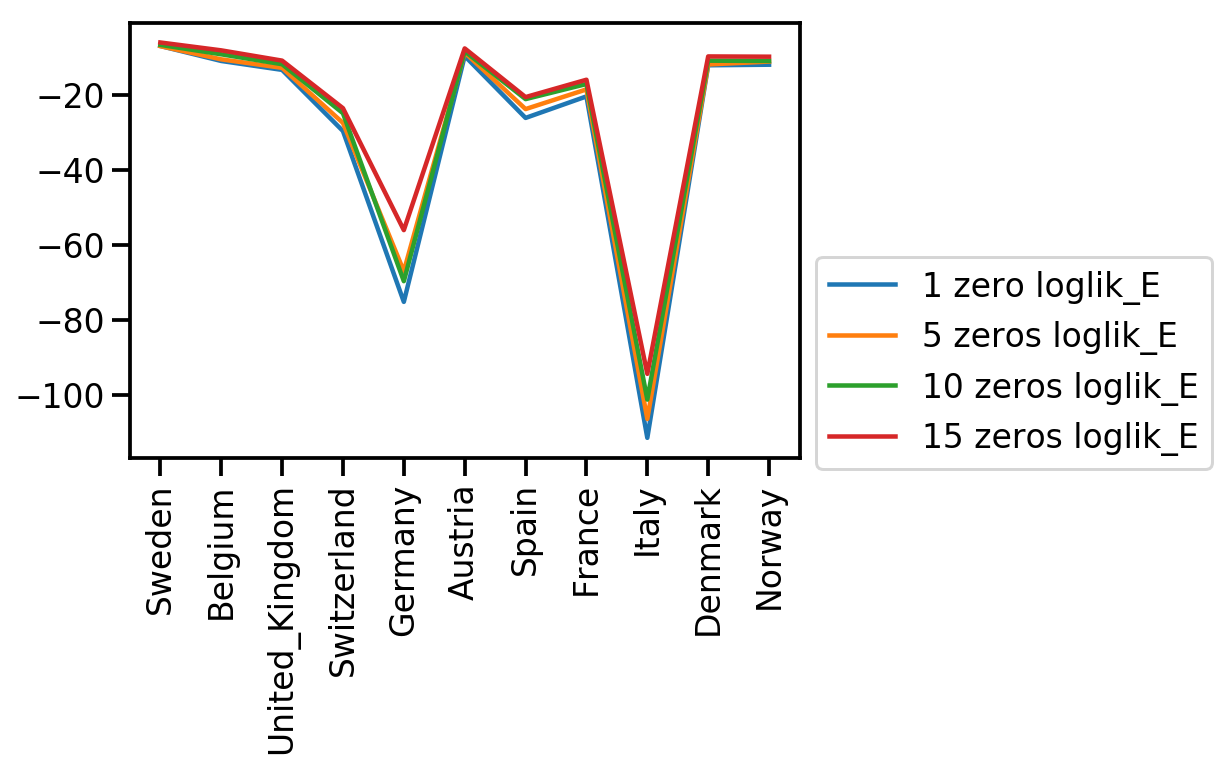

In [21]:
import matplotlib.pyplot as plt
plt.plot(one[1],label='1 zero loglik_E')
plt.plot(five[1],label='5 zeros loglik_E')
plt.plot(ten[1], label='10 zeros loglik_E')
plt.plot(fiveteen[1], label='15 zeros loglik_E')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);

list(zip(countries,round_list(one[1]),round_list(five[1]),round_list(ten[1]),round_list(fiveteen[1])
        ))

[('Sweden', -14.4, -14.5, -14.7, -14.9),
 ('Belgium', -16.8, -16.4, -15.9, -15.6),
 ('United_Kingdom', -20.0, -19.6, -18.5, -17.5),
 ('Switzerland', -38.3, -38.2, -37.8, -40.5),
 ('Germany', -93.8, -95.1, -110.7, -99.4),
 ('Austria', -16.5, -17.4, -17.4, -18.5),
 ('Spain', -36.9, -40.7, -50.6, -49.1),
 ('France', -27.1, -29.0, -27.0, -35.0),
 ('Italy', -122.9, -133.1, -133.2, -139.7),
 ('Denmark', -21.0, -20.7, -20.1, -21.2),
 ('Norway', -19.0, -19.0, -18.1, -18.5)]

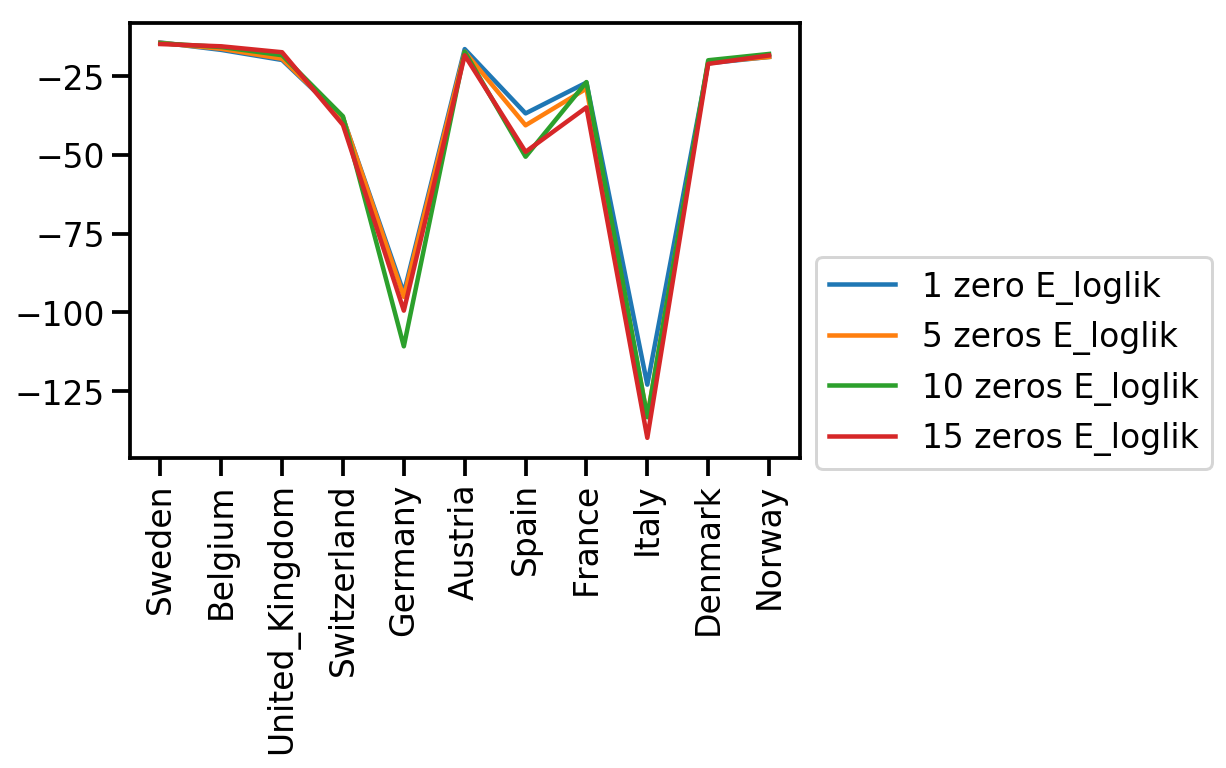

In [23]:
import matplotlib.pyplot as plt
plt.plot(one[2],label='1 zero E_loglik')
plt.plot(five[2],label='5 zeros E_loglik')
plt.plot(ten[2], label='10 zeros E_loglik')
plt.plot(fiveteen[2], label='15 zeros E_loglik')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
plt.
list(zip(countries,round_list(one[2]),round_list(five[2]),round_list(ten[2]),round_list(fiveteen[2])
        ))

In [34]:
%%time
from scipy.stats import truncnorm, randint
ndays = 60
lower = 1
upper = ndays - 2
μ = 15
σ = 5
for i in range(100000):
    truncnorm( (lower - μ) / σ, (upper - μ) / σ, loc=μ, scale=σ ).logpdf(15)

CPU times: user 1min 33s, sys: 1.2 s, total: 1min 35s
Wall time: 2min 1s


In [35]:
%%time
from scipy.stats import truncnorm, randint
ndays = 60
lower = 1
upper = ndays - 2
μ = 15
σ = 5
dist = truncnorm( (lower - μ) / σ, (upper - μ) / σ, loc=μ, scale=σ )
for i in range(100000):
    dist.logpdf(15)

CPU times: user 19.7 s, sys: 249 ms, total: 19.9 s
Wall time: 27.4 s


In [36]:
Δt0

NameError: name 'Δt' is not defined